<a href="https://colab.research.google.com/github/RP-7/ComputerScience_Research_PaperML/blob/main/CS_EE_SVR_and_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Dataset**

In [ ]:
dataset = pd.read_csv('CS_EE_Dataset.csv')
x_train = dataset.iloc[:,:-1].values
y_train = dataset.iloc[:,-1:].values
testset = pd.read_csv('CS_EE_Testset.csv')
x_test = testset.iloc[:,:-1].values
y_test = testset.iloc[:,-1:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[ 700]
 [ 890]
 [1080]
 [1450]
 [1850]
 [2640]
 [3105]
 [2801]
 [2634]
 [2862]
 [3144]
 [3522]
 [4872]
 [5267]
 [6232]]
[[44.1 ]
 [45.31]
 [41.35]
 [48.41]
 [45.73]
 [46.67]
 [53.44]
 [62.33]
 [62.97]
 [66.46]
 [70.09]
 [70.39]
 [74.57]
 [81.35]
 [81.94]]
[[1250]
 [2960]
 [4865]
 [2967]]
[[43.51]
 [56.57]
 [76.38]
 [67.79]]


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_xtrain = StandardScaler()
sc_ytrain = StandardScaler()
sc_xtest = StandardScaler()
sc_ytest = StandardScaler()
x_train = sc_xtrain.fit_transform(x_train)
y_train = sc_ytrain.fit_transform(y_train)
x_test = sc_xtest.fit_transform(x_test)
y_test = sc_ytest.fit_transform(y_test)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[-1.38885994]
 [-1.26725096]
 [-1.14564197]
 [-0.90882448]
 [-0.65280556]
 [-0.14716821]
 [ 0.15045378]
 [-0.04412059]
 [-0.15100849]
 [-0.00507771]
 [ 0.17541563]
 [ 0.4173535 ]
 [ 1.28141734]
 [ 1.53423601]
 [ 2.15188164]]
[[-1.14220096]
 [-1.05345927]
 [-1.34388663]
 [-0.82610451]
 [-1.02265636]
 [-0.95371654]
 [-0.45720308]
 [ 0.19479169]
 [ 0.24172944]
 [ 0.4976869 ]
 [ 0.76391198]
 [ 0.78591406]
 [ 1.09247628]
 [ 1.58972313]
 [ 1.63299388]]
[[-1.37650712]
 [-0.03948515]
 [ 1.45000423]
 [-0.03401196]]
[[-1.42351094]
 [-0.36434257]
 [ 1.24225204]
 [ 0.54560147]]


**Training the SVR model with dataset**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Testing with prediction**

In [ ]:
sc_ytrain.inverse_transform(regressor.predict(sc_xtrain.transform([[700]])).reshape(-1,1))
sc_ytrain.inverse_transform(regressor.predict(sc_xtrain.transform([[4872]])).reshape(-1,1))
am = sc_ytest.inverse_transform(regressor.predict(x_test).reshape(-1,1))
print(sc_xtest.inverse_transform(x_test),am)
#the input is taken and transfored to feature sclaed data feature scaleing is used for scaled which outputs the result in reversed feauted scale method for better understanding, the reshape helps eliminating the formatting error

[[1250.]
 [2960.]
 [4865.]
 [2967.]] [[48.15080651]
 [64.62570863]
 [77.43693456]
 [64.70916541]]


**Visualising training set**

<function matplotlib.pyplot.show(close=None, block=None)>

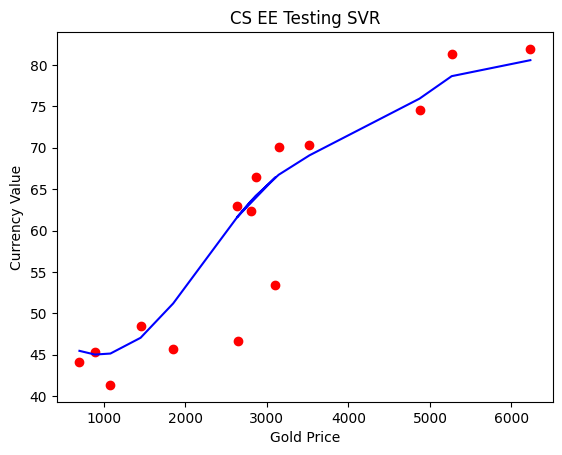

In [ ]:
plt.scatter(sc_xtrain.inverse_transform(x_train),sc_ytrain.inverse_transform(y_train),color = 'red')
plt.plot(sc_xtrain.inverse_transform(x_train), sc_ytrain.inverse_transform(regressor.predict(x_train).reshape(-1,1)), color = 'blue')
plt.title('CS EE Testing SVR')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Higher resolution and smooth curve training set**

<function matplotlib.pyplot.show(close=None, block=None)>

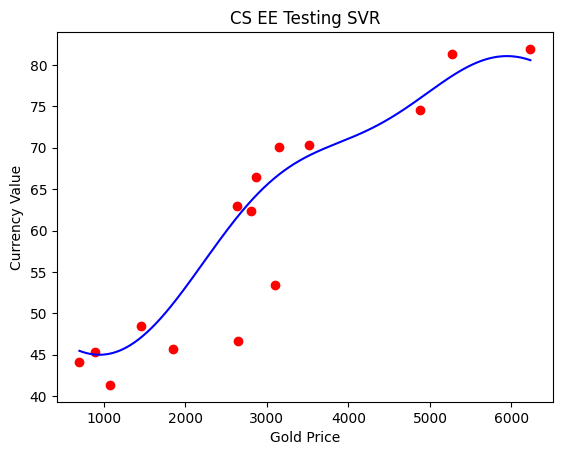

In [ ]:
x_grid = np.arange(min(sc_xtrain.inverse_transform(x_train)), max(sc_xtrain.inverse_transform(x_train)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_xtrain.inverse_transform(x_train),sc_ytrain.inverse_transform(y_train),color = 'red')
plt.plot(x_grid,sc_ytrain.inverse_transform(regressor.predict(sc_xtrain.transform(x_grid)).reshape(-1,1)),color = 'blue')
plt.title('CS EE Testing SVR')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Visualizing test set**

<function matplotlib.pyplot.show(close=None, block=None)>

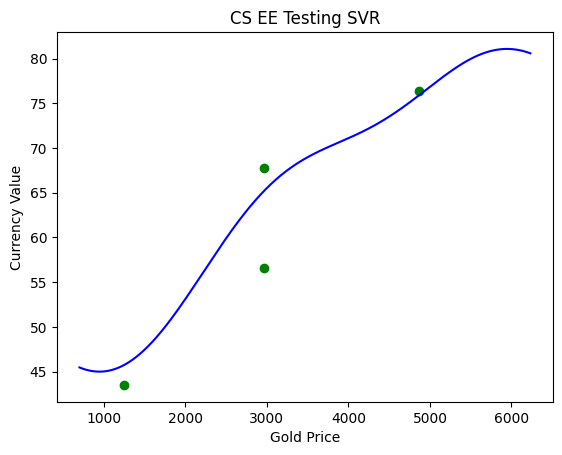

In [ ]:
x_grid = np.arange(min(sc_xtrain.inverse_transform(x_train)), max(sc_xtrain.inverse_transform(x_train)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_xtest.inverse_transform(x_test),sc_ytest.inverse_transform(y_test),color = 'green')
plt.plot(x_grid,sc_ytrain.inverse_transform(regressor.predict(sc_xtrain.transform(x_grid)).reshape(-1,1)),color = 'blue')
plt.title('CS EE Testing SVR')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Training the Random Forest Regression Model in the dataset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(x_train, y_train)


[[-1.38885994]
 [-1.26725096]
 [-1.14564197]
 [-0.90882448]
 [-0.65280556]
 [-0.14716821]
 [ 0.15045378]
 [-0.04412059]
 [-0.15100849]
 [-0.00507771]
 [ 0.17541563]
 [ 0.4173535 ]
 [ 1.28141734]
 [ 1.53423601]
 [ 2.15188164]]


<ipython-input-40-ed54a8ba1b4f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(x_train, y_train)


**Visualising Training set**

<function matplotlib.pyplot.show(close=None, block=None)>

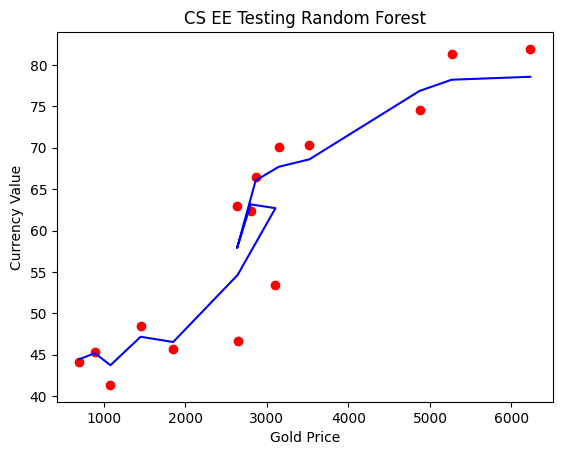

In [ ]:
plt.scatter(sc_xtrain.inverse_transform(x_train),sc_ytrain.inverse_transform(y_train),color = 'red')
plt.plot(sc_xtrain.inverse_transform(x_train), sc_ytrain.inverse_transform(RFregressor.predict(x_train).reshape(-1,1)), color = 'blue')
plt.title('CS EE Testing Random Forest')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Higher resolution**

<function matplotlib.pyplot.show(close=None, block=None)>

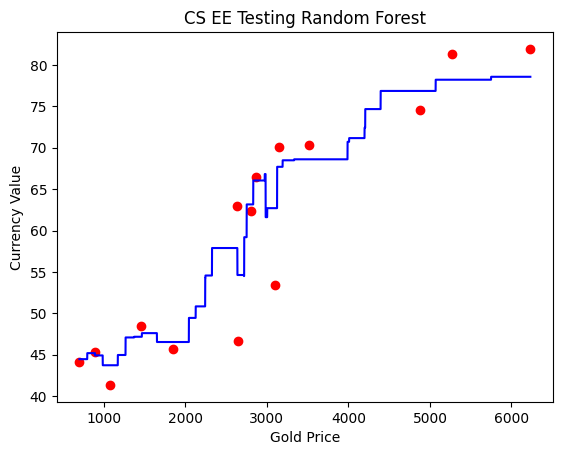

In [ ]:
x_grid = np.arange(min(sc_xtrain.inverse_transform(x_train)), max(sc_xtrain.inverse_transform(x_train)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_xtrain.inverse_transform(x_train),sc_ytrain.inverse_transform(y_train),color = 'red')
plt.plot(x_grid,sc_ytrain.inverse_transform(RFregressor.predict(sc_xtrain.transform(x_grid)).reshape(-1,1)),color = 'blue')
plt.title('CS EE Testing Random Forest')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

**Visualising Test Set**

<function matplotlib.pyplot.show(close=None, block=None)>

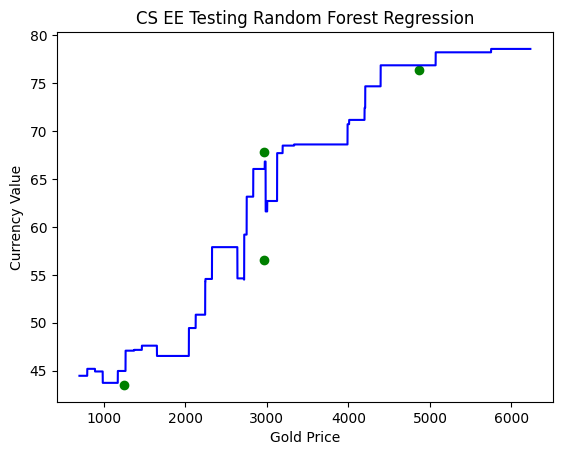

In [ ]:
x_grid = np.arange(min(sc_xtrain.inverse_transform(x_train)), max(sc_xtrain.inverse_transform(x_train)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_xtest.inverse_transform(x_test),sc_ytest.inverse_transform(y_test),color = 'green')
plt.plot(x_grid,sc_ytrain.inverse_transform(RFregressor.predict(sc_xtrain.transform(x_grid)).reshape(-1,1)),color = 'blue')
plt.title('CS EE Testing Random Forest Regression')
plt.xlabel('Gold Price')
plt.ylabel('Currency Value')
plt.show

In [ ]:
am = sc_ytest.inverse_transform(regressor.predict(x_test).reshape(-1,1))
af = sc_ytest.inverse_transform(RFregressor.predict(x_test).reshape(-1,1))
print(sc_xtest.inverse_transform(x_test),am)
print("-------------------")
print(sc_xtest.inverse_transform(x_test),af)
print("-------------------")
print(sc_xtest.inverse_transform(x_test),sc_ytest.inverse_transform(y_test))

[[1250.]
 [2960.]
 [4865.]
 [2967.]] [[48.15080651]
 [64.62570863]
 [77.43693456]
 [64.70916541]]
-------------------
[[1250.]
 [2960.]
 [4865.]
 [2967.]] [[47.30693955]
 [64.21133055]
 [77.83395645]
 [64.21133055]]
-------------------
[[1250.]
 [2960.]
 [4865.]
 [2967.]] [[43.51]
 [56.57]
 [76.38]
 [67.79]]
